# TP graphe à rendre

On considère un graphe `G` d'ordre `n`. On réutilisera au maximum nos fonctions plutôt que les fonctions de networkx.
On veillera à minimiser la complexité algorithmique des implémentations. Toutes les réflexions sur la complexités/le code peuvent être ajoutées en commentaire dans le code. Faites attention à vos structures de données. Dans le cas des parcours de graphes, on effectuera toujours le parcours dans l'ordre croissant. 

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

## Mise en place des outils

**Question** Implémenter une méthode `BFS` qui prend en entrée un graphe `G` et un sommet `s` et qui renvoie le tableau dans l'ordre de visite depuis `s` des éléments ainsi qu'un second tableau de taille `n` tel qu'à chaque indice `i`, on connaisse la distance entre `s` et `i`.



In [2]:
from collections import deque

def BFS(G, s):
    n = len(G)
    visited = [False] * n
    distances = [-1] * n  # Initiate distances with -1 for unreachable vertices
    order_of_visit = []
    queue = deque()

    queue.append(s)
    visited[s] = True
    distances[s] = 0

    while queue:
        u = queue.popleft()
        order_of_visit.append(u)

        for v in G[u]:
            if not visited[v]:
                queue.append(v)
                visited[v] = True
                distances[v] = distances[u] + 1

    return order_of_visit, distances

In [3]:
# Place pour tester votre fonction
graph = [
    [1, 2],     # Adjacency list of vertex 0
    [0, 3],     # Adjacency list of vertex 1
    [0, 4, 5],  # Adjacency list of vertex 2
    [1],        # Adjacency list of vertex 3
    [2],        # Adjacency list of vertex 4
    [2]         # Adjacency list of vertex 5
]

start_vertex = 0
order, distances = BFS(graph, start_vertex)

print(f"L'ordre de visite depuis le sommet {start_vertex} est : {order}")
print(f"Les distances depuis le sommet {start_vertex} sont : {distances}")

L'ordre de visite depuis le sommet 0 est : [0, 1, 2, 3, 4, 5]
Les distances depuis le sommet 0 sont : [0, 1, 1, 2, 2, 2]


**Question** Implémenter une méthode `DFS` qui renvoie le tableau des éléments visités dans l'ordre de visite depuis un sommet `s`.

In [10]:
def DFS(G, s):
    visited = set()
    order_of_visit = []

    def explore(v):
        visited.add(v)
        order_of_visit.append(v)
        for neighbor in G[v]:
            if neighbor not in visited:
                explore(neighbor)

    explore(s)
    return order_of_visit

In [12]:
# Place pour tester votre fonction
graph = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 4, 5],
    3: [1],
    4: [2],
    5: [2]
}

start_vertex = 0
order = DFS(graph, start_vertex)

print(f"L'ordre de visite depuis le sommet {start_vertex} est : {order}")

L'ordre de visite depuis le sommet 0 est : [0, 1, 3, 2, 4, 5]


**Question**  Implémenter une méthode `isConnected` qui permet de savoir si un graphe est connexe.

In [13]:
def isConnected(G):
    n = len(G)
    visited = [False] * n
    queue = deque()

    queue.append(0)
    visited[0] = True

    while queue:
        u = queue.popleft()

        for v in G[u]:
            if not visited[v]:
                queue.append(v)
                visited[v] = True

    return all(visited)

In [14]:
# Place pour tester votre fonction

graph = [
    [1, 2],     # Adjacency list of vertex 0
    [0, 3],     # Adjacency list of vertex 1
    [0, 4, 5],  # Adjacency list of vertex 2
    [1],        # Adjacency list of vertex 3
    [2],        # Adjacency list of vertex 4
    [2]         # Adjacency list of vertex 5
]

print(f"Le graphe est-il connexe ? {isConnected(graph)}")


Le graphe est-il connexe ? True


**Question** Créer une méthode `connectedComponent` qui renvoie une liste contenant les lists de toutes les composantes connexes. On veillera à ce que les listes des composantes connexes soit triées et que la listes contenants les listes soit triées par ordre du sommets le plus petit. 

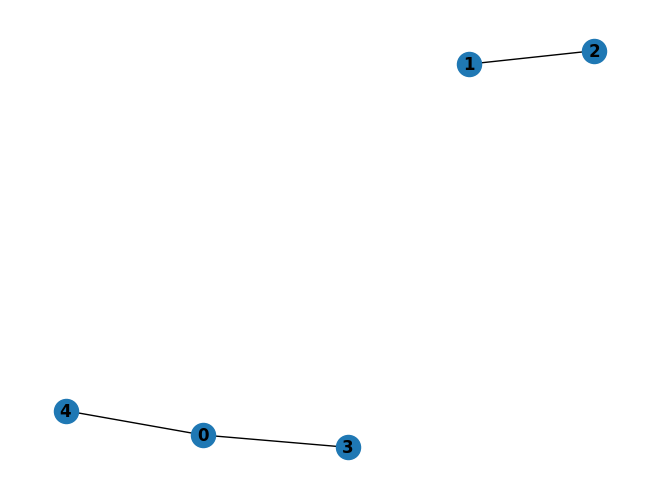

In [19]:
# Exemple 
G = nx.Graph([(0,3), (0, 4), (1, 2)])
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()  
answer = [[0, 3, 4],[1, 2]]

In [15]:
def connectedComponent(G):
    n = len(G)
    visited = [False] * n
    components = []

    for u in range(n):
        if not visited[u]:
            component = []
            queue = deque()
            queue.append(u)
            visited[u] = True

            while queue:
                v = queue.popleft()
                component.append(v)

                for w in G[v]:
                    if not visited[w]:
                        queue.append(w)
                        visited[w] = True

            components.append(component)

    return components

In [16]:
# Place pour tester votre fonction

graph = [
    [1, 2],     # Adjacency list of vertex 0
    [0, 3],     # Adjacency list of vertex 1
    [0, 4, 5],  # Adjacency list of vertex 2
    [1],        # Adjacency list of vertex 3
    [2],        # Adjacency list of vertex 4
    [2]         # Adjacency list of vertex 5
]

print(f"Les composantes connexes du graphe sont : {connectedComponent(graph)}")


Les composantes connexes du graphe sont : [[0, 1, 2, 3, 4, 5]]


**Question**  Sans utiliser les méthodes de networkx dédiées, implémenter une méthode  `hasCycle` qui permet de savoir si il existe un cycle dans le graphe

In [20]:
def hasCycle(G):
    n = len(G)
    visited = [False] * n
    parent = [None] * n

    def explore(v):
        visited[v] = True

        for neighbor in G[v]:
            if not visited[neighbor]:
                parent[neighbor] = v
                explore(neighbor)
            elif parent[v] != neighbor:
                return True

        return False

    for u in range(n):
        if not visited[u] and explore(u):
            return True

    return False

In [21]:
# Place pour tester votre fonction

graph = [
    [1, 2],     # Adjacency list of vertex 0
    [0, 3],     # Adjacency list of vertex 1
    [0, 4, 5],  # Adjacency list of vertex 2
    [1],        # Adjacency list of vertex 3
    [2],        # Adjacency list of vertex 4
    [2]         # Adjacency list of vertex 5
]

print(f"Le graphe contient-il un cycle ? {hasCycle(graph)}")


Le graphe contient-il un cycle ? False


**Question** Implémenter l'algorithme de `Kruskal` qui renvoie la liste des arêtes d'un arbre couvrant de poids minimum sous forme d'un tableau de tuple.

In [25]:
def Kruskal(G):
    n = len(G)
    edges = []
    for u in range(n):
        for v in G[u]:
            edges.append((u, v))

    edges.sort(key=lambda edge: G[edge[0]][edge[1]])

    parent = list(range(n))
    rank = [0] * n

    def find(u):
        if parent[u] != u:
            parent[u] = find(parent[u])
        return parent[u]

    def union(u, v):
        u_root = find(u)
        v_root = find(v)

        if u_root == v_root:
            return False

        if rank[u_root] > rank[v_root]:
            parent[v_root] = u_root
        elif rank[u_root] < rank[v_root]:
            parent[u_root] = v_root
        else:
            parent[v_root] = u_root
            rank[u_root] += 1

        return True

    mst = []
    for edge in edges:
        u, v = edge
        if union(u, v):
            mst.append(edge)

    return mst
    


In [24]:
# Place pour tester votre fonction





TypeError: cannot unpack non-iterable int object

**Question** Implémenter l'algorithme de `Dijkstra` qui renvoie la liste des nœuds traversés lors du plus cours chemin entre `e` et `s` en intégrant `e` et `s`.

In [ ]:
def Dijkstra(G, e, s):
    pass

In [ ]:
# Place pour tester votre fonction

## Pratique

On souhaite maintenant utiliser les outils précédents dans un cas concret. Pour cela, on va utiliser la librairie [OSMnx](https://osmnx.readthedocs.io/en/stable/) qui permet de faire un lien entre [NetworkX](https://networkx.org) et [OpenStreetMap](https://www.openstreetmap.org).

On peut par example charger un graphe de la ville de Lyon et l'afficher.

In [ ]:
import osmnx as ox
import sklearn

G = ox.graph_from_place("Lyon, France", network_type="drive")
ox.graph_to_gdfs(G, nodes=False).explore()

On peut aussi récupérer le nœud le plus proche d'un point. Pour trouver la position on peut regarder l'[url](https://www.openstreetmap.org/#map=19/45.75784/4.83220) et regarder le [nœud](https://www.openstreetmap.org/node/4367136876)

In [ ]:
node = ox.nearest_nodes(G, 4.83220, 45.75784)

**Question** Existe-il des endroits non accessibles par la route dans Lyon?

**Question** On souhaite maintenant relier toutes les intersections entre elles avec un cable de fibre optique. On souhaite minimiser le coût de fibre. Quelle longueur de cable faut-il?

**Question** Combien d'instruction au minimumum faut-il donner à un visiteur qui souhaite se déplacer entre deux points `from` et `to` de Lyon ?

**Question** Afficher le plus court chemin entre deux points `from` et `to` de Lyon de votre choix en utilisant la méthode `ox.plot_graph_route()`